In [1]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

NameError: name 'churn_df' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [9]:
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df['diabetes'].values

In [10]:
#class imbalanc shit - diabetes_df should look like this -->
''' pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  diabetes
0              6      148         72       35        0  33.6  0.627   50         1
1              1       85         66       29        0  26.6  0.351   31         0
2              8      183         64        0        0  23.3  0.672   32         1
3              1       89         66       23       94  28.1  0.167   21         0
4              0      137         40       35      168  43.1  2.288   33         1
..           ...      ...        ...      ...      ...   ...    ...  ...       ...
763           10      101         76       48      180  32.9  0.171   63         0
764            2      122         70       27        0  36.8  0.340   27         0
765            5      121         72       23      112  26.2  0.245   30         0
766            1      126         60        0        0  30.1  0.349   47         1
767            1       93         70       31        0  30.4  0.315   23         0'''

# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



In [11]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.62309199 0.11451569 0.26915632 0.28767555 0.0037674  0.1842908
 0.47714301 0.92201771 0.09809034 0.78394707]


c:\Users\TheEarthG\.conda\envs\Forage\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


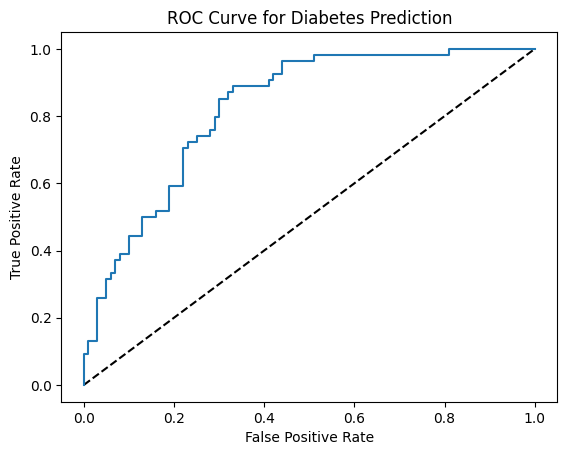

In [12]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

In [13]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8238888888888889
[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



Hyperparameter Tunning

In [15]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
lasso = LogisticRegression()
# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

NameError: name 'kf' is not defined

In [ ]:
# Create the parameter space
from sklearn.model_selection import RandomizedSearchCV

params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

In [ ]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies['popularity'].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Preprocessing Data

In [ ]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

In [ ]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

In [ ]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

In [ ]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

In [ ]:
import cv2
import numpy as np
from scipy import ndimage
import os

def detect_keypoints(image, sigma=1.6, num_intervals=3, assumed_blur=0.5, image_border_width=5):
    image = image.astype('float32')
    base_image = ndimage.gaussian_filter(image, sigma)
    num_octaves = int(np.log2(min(image.shape)) - 1)
    keypoints = []

    for octave in range(num_octaves):
        octave_image = base_image
        for interval in range(num_intervals + 3):
            sigma = 2 ** (octave + (interval + 1) / num_intervals)
            image = ndimage.gaussian_filter(octave_image, sigma)
            if interval >= 1 and interval <= num_intervals:
                prev_image = ndimage.gaussian_filter(octave_image, 2 ** (octave + (interval) / num_intervals))
                dog_image = image - prev_image
                keypoints.extend(find_extrema(dog_image, octave, interval, image_border_width))
            octave_image = image

        base_image = ndimage.zoom(base_image, 0.5)

    return keypoints


def find_extrema(image, octave, interval, image_border_width):
    threshold = 0.04
    keypoints = []
    for i in range(image_border_width, image.shape[0] - image_border_width):
        for j in range(image_border_width, image.shape[1] - image_border_width):
            if is_extremum(image, i, j, threshold):
                keypoints.append((i, j, octave, interval))

    return keypoints


def is_extremum(image, i, j, threshold):
    """
    Check if the given point is an extremum.
    """
    val = image[i, j]
    max_val = max(max(image[i-1:i+2, j-1:j+2].flatten()), max(image[i-1:i+2, j].flatten()), max(image[i, j-1:j+2].flatten()))
    min_val = min(min(image[i-1:i+2, j-1:j+2].flatten()), min(image[i-1:i+2, j].flatten()), min(image[i, j-1:j+2].flatten()))

    if val > 0 and val >= threshold * max_val:
        return True
    elif val < 0 and val <= threshold * min_val:
        return True
    return False

def compute_descriptor(image, keypoints, num_bins=8):
    """
    Compute descriptors for the given keypoints.
    """
    descriptors = []
    for keypoint in keypoints:
        x, y, octave, interval = keypoint
        patch = get_patch(image, x, y, octave)
        histogram = np.zeros((num_bins, num_bins))
        for i in range(patch.shape[0]):
            for j in range(patch.shape[1]):
                magnitude = np.sqrt(patch[i, j, 0]**2 + patch[i, j, 1]**2)
                direction = np.arctan2(patch[i, j, 1], patch[i, j, 0])
                bin_x = int(np.floor((direction + np.pi) / (2 * np.pi / num_bins)))
                bin_y = int(np.floor(magnitude / (255 / num_bins)))
                # Ensure bin indices are within valid range
                bin_x = max(0, min(bin_x, num_bins - 1))
                bin_y = max(0, min(bin_y, num_bins - 1))
                histogram[bin_x, bin_y] += 1
        descriptors.append(histogram.flatten())

    return descriptors


def get_patch(image, x, y, octave):
    """
    Get a patch of the given image.
    """
    patch_size = 16
    patch = np.zeros((patch_size, patch_size, 2))
    for i in range(patch_size):
        for j in range(patch_size):
            patch[i, j, 0] = image[x + i - patch_size // 2, y + j - patch_size // 2]
            patch[i, j, 1] = image[x + i - patch_size // 2 + 1, y + j - patch_size // 2] - image[x + i - patch_size // 2 - 1, y + j - patch_size // 2]
    return patch


def sift_algorithm(image_path):
    """
    Run the SIFT algorithm on the given image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    keypoints = detect_keypoints(image)
    descriptors = compute_descriptor(image, keypoints)
    return keypoints, descriptors


def main():
    image_dir = 'C:\\Users\\TheEarthG\\OneDrive\\Pictures\\images'
    keypoints_dict = {}
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            keypoints, descriptors = sift_algorithm(image_path)
            keypoints_dict[filename] = keypoints
    np.save('keypoints.npy', keypoints_dict)


if __name__ == "__main__":
    main()